# Detección de barras en galaxias - Preprocesamiento de imágenes
## Proyecto integrador MNA

### Integrantes
- Jonathan Jesús Marmolejo Hernández - A01795195
- Isaid Posadas Oropeza - A01795015
- Luis Daniel Ortega Muñoz - A01795197

## Introducción

En este ejercicio se explorarán diferentes técnicas de procesamiento de imágenes, con la intención de definir un "pipeline" de preprocesamiento que será aplicado a las imágenes del dataset que ayude a resaltar las estructuras de barras encontradas en las imágenes.

Para efectos de este ejercicio, las técnicas de procesamiento de imágenes serán evaluadas de forma cualitativa; es decir, se aplicarán diversas técnicas y se seleccionarán aquellas que mejor resalten las estructuras de barras a simple vista. En etapas posteriores de este proyecto se compararán estas técnicas de forma cuantitativa, al comparar el impacto que estas tienen en el desempeño de un modelo de clasificación de imágenes.

## Importación de librerías y carga del dataset

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from bargal.images.client import GalaxyImageClient
from bargal.models import Observation

In [2]:
df = pd.read_csv("../data/dataset.csv")

La función `get_random_galaxy` nos ayudará a tomar muestras aleatorias de galaxias del dataset para fines demostrativos durante este ejercicio.

In [3]:
def get_random_galaxy(label=None):
    if label is None:
        return df.sample(1).to_dict(orient='records')[0]

    return df[df.Bars == label].sample(1).to_dict(orient='records')[0]

Asímismo, creamos una instancia de `GalaxyImageClient` para gestionar la descarga de imágenes de las galaxias en el dataset. Este cliente funciona como una abstracción del mecanismo de descarga de imágenes, además de gestionar el almacenamiento de imágenes de forma local para evitar descargas innecesarias.

In [4]:
img_client = GalaxyImageClient(storage_path="../data/images")

## Carga de imágenes

En el [notebook anterior](https://github.com/ludanortmun/itesm-mna-barred-galaxies/blob/main/notebooks/Avance1.Equipo22.ipynb) exploramos las imágenes del dataset, incluyendo las imágenes RGB así como las imágenes en bandas individuales (G, R y Z). 

Con la finalidad de agilizar el manejo de las observaciones de galaxias en diferentes bandas, se creó la clase `Observation`, que encapsula la representación de la galaxia en imágenes RGB y en bandas individuales. La representación RGB es obtenida directamente de la fuente de datos original sin ninguna modificación. Las imágenes en bandas individuales se obtienen también de la fuente de datos, pero son transformadas a escala de grises. Esto es debido a que estas imágenes representan solamente una banda de luz, por lo que no tienen sentido en color. 

Cabe destacar que cada una de estas imágenes en la clase `Observation` están representadas en forma de arreglos multidimensionales; para el caso de la representación RGB se tiene un arreglo de 3 dimensiones, mientras que las imágenes en bandas individuales son representadas como arreglos de 2 dimensiones.

Además de lo anterior, el cliente `GalaxyImageClient` ha sido actualizado para cargar imágenes en forma de objetos de la clase `Observation`.

In [5]:
g = get_random_galaxy(label=1)
observation = img_client.get_as_observation(g, save_to_disk=True)

print("RGB image shape:", observation.rgb_repr.shape)
print("G image shape:", observation.g_band.shape)
print("R image shape:", observation.r_band.shape)
print("Z image shape:", observation.z_band.shape)

RGB image shape: (800, 800, 3)
G image shape: (800, 800)
R image shape: (800, 800)
Z image shape: (800, 800)


La siguiente función puede utilizarse para visualizar lado a lado las imágenes de una galaxia en sus diferentes representaciones.

In [6]:
def display_observation(o: Observation):
    fig, axs = plt.subplots(1, 4, figsize=(20, 5))
    axs[0].imshow(o.rgb_repr)
    axs[0].set_title("RGB")
    axs[1].imshow(o.g_band, cmap="gray")
    axs[1].set_title("G")
    axs[2].imshow(o.r_band, cmap="gray")
    axs[2].set_title("R")
    axs[3].imshow(o.z_band, cmap="gray")
    axs[3].set_title("Z")
    for ax in axs:
        ax.axis("off")
    plt.show()

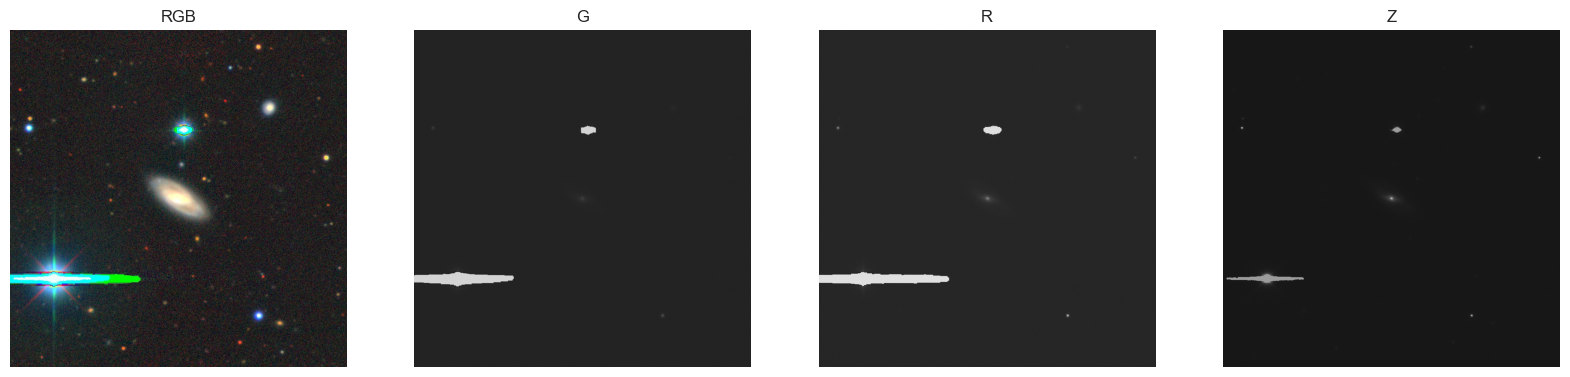

In [7]:
display_observation(observation)